# Wide & Deep neural network

**One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al.⁠15 It connects all or part of the inputs directly to the output layer,This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).⁠16 In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.** 

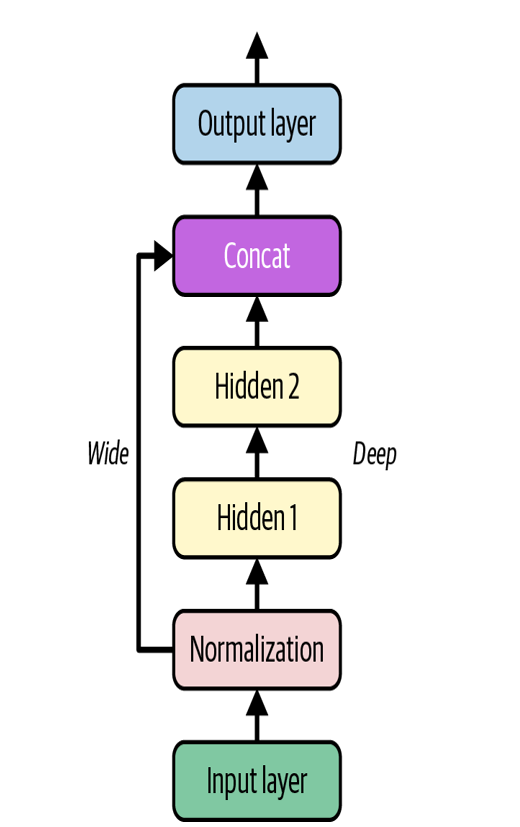

In [2]:
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
housing = fetch_california_housing()

In [4]:
x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42 )

In [5]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

**First, we create five layers: a Normalization layer to standardize the inputs, two Dense layers with 30 neurons each, using the ReLU activation function, a Concatenate layer, and one more Dense layer with a single neuron for the output layer, without any activation function.**

In [7]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30,activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

**Next, we create an Input object (the variable name input_ is used to avoid overshadowing Python’s built-in input() function). This is a specification of the kind of input the model will get, including its shape and optionally its dtype, which defaults to 32-bit floats. A model may actually have multiple inputs, as you will see shortly.**

In [12]:
input_ = tf.keras.layers.Input(shape=x_train.shape[1:])


**Then we use the Normalization layer just like a function, passing it the Input object. This is why this is called the functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet, as the Input object is just a data specification. In other words, it’s a symbolic input. The output of this call is also symbolic: normalized doesn’t store any actual data, it’s just used to construct the model.**

In [13]:
normalized = normalization_layer(input_)


**Then we use the Normalization layer just like a function, passing it the Input object. This is why this is called the functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet, as the Input object is just a data specification. In other words, it’s a symbolic input. The output of this call is also symbolic: normalized doesn’t store any actual data, it’s just used to construct the model.**

In [14]:
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

**Then we use the Normalization layer just like a function, passing it the Input object. This is why this is called the functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet, as the Input object is just a data specification. In other words, it’s a symbolic input. The output of this call is also symbolic: normalized doesn’t store any actual data, it’s just used to construct the model.**

In [15]:
concat = concat_layer([normalized,hidden2])


**Then we pass concat to the output_layer, which gives us the final output.**

In [16]:
output = output_layer(concat)


### model

In [19]:
model = tf.keras.Model(inputs=[input_],outputs=[output])

**Once you have built this Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you compile the model, adapt the Normalization layer, fit the model, evaluate it, and use it to make predictions.**

--------------------

# Handling multiple inputs

**But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We can do this as follows:**

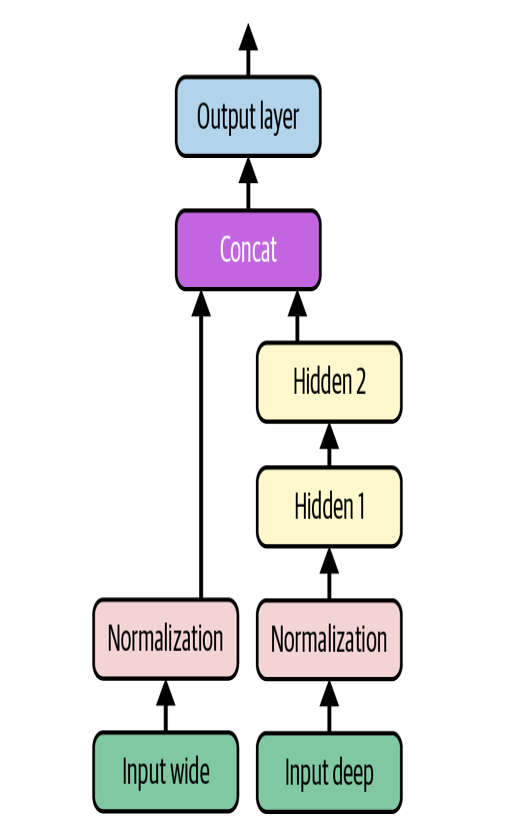

In [29]:
input_wide = tf.keras.layers.Input(shape=[5]) # 0 t0 4
input_deep = tf.keras.layers.Input(shape=[6]) # 2 to 7

In [30]:
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()

In [31]:
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)

In [35]:
hidden1 = tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat= tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)

### model

In [37]:
model = tf.keras.Model(inputs=[input_wide,norm_deep],outputs=[output])

There are a few things to note in this example, compared to the previous one:



Each Dense layer is created and called on the same line. This is a common practice, as it makes the code more concise without losing clarity. However, we can’t do this with the Normalization layer since we need a reference to the layer to be able to call its adapt() method before fitting the model.


We used tf.keras.layers.concatenate(), which creates a Concatenate layer and calls it with the given inputs.


We specified inputs=[input_wide, input_deep] when creating the model, since there are two inputs.

**Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_wide, X_train_deep), one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():**

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


In [39]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [41]:
X_train_wide, X_train_deep = x_train[:, :5], x_train[:, 2:]
X_valid_wide, X_valid_deep = x_valid[:, :5], x_valid[:, 2:]
X_test_wide, X_test_deep = x_test[:, :5], x_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [42]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [43]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20


363/363 [==============================] - 3s 5ms/step - loss: 586.9473 - root_mean_squared_error: 24.2270 - val_loss: 12.8432 - val_root_mean_squared_error: 3.5837
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 2.3098 - root_mean_squared_error: 1.5198 - val_loss: 10.3420 - val_root_mean_squared_error: 3.2159
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.7959 - root_mean_squared_error: 1.3401 - val_loss: 8.4117 - val_root_mean_squared_error: 2.9003
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 1.7612 - root_mean_squared_error: 1.3271 - val_loss: 7.7558 - val_root_mean_squared_error: 2.7849
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3433 - root_mean_squared_error: 1.1590 - val_loss: 5.7494 - val_root_mean_squared_error: 2.3978
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 1.5537 - root_mean_squared_error: 1.2465 - val_loss: 4.9506

In [44]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 206ms/step


---------------------------------

# Handing multiple outputs

#### There are also many use cases in which you may want to have multiple outputs:



**The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression tasks and a classification task.**


**Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.**


**Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add an auxiliary output in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.**

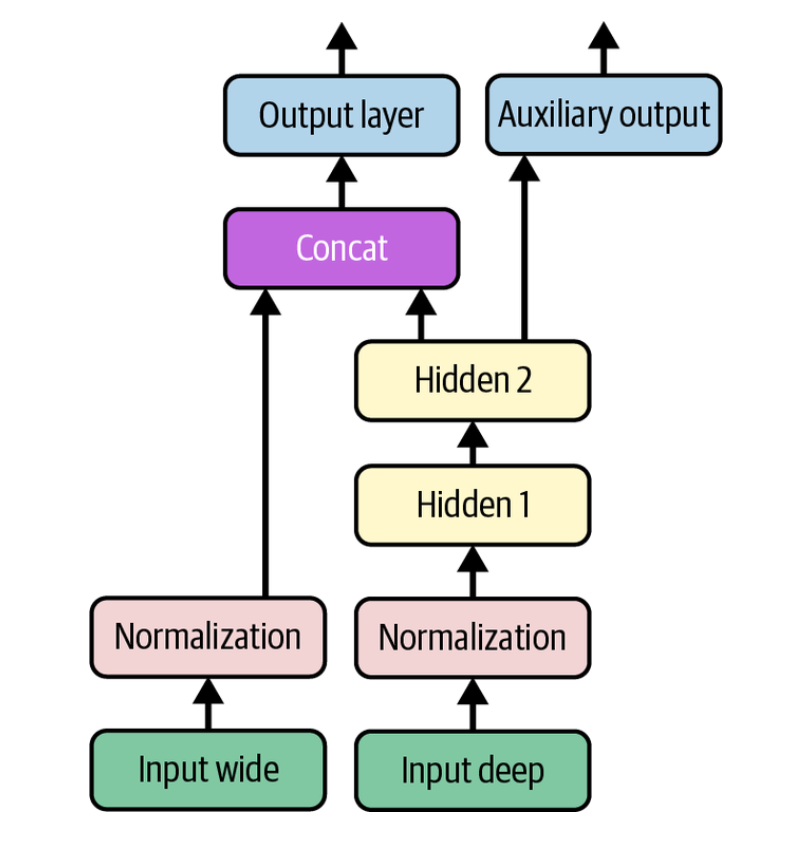

In [46]:
[...]  # Same as above, up to the main output layer
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

In [47]:
model = tf.keras.Model(inputs=[input_wide,norm_deep],outputs=[output,aux_output])

**Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses. If we pass a single loss, Keras will assume that the same loss must be used for all outputs. By default, Keras will compute all the losses and simply add them up to get the final loss used for training. Since we care much more about the main output than about the auxiliary output (as it is just used for regularization), we want to give the main output’s loss a much greater weight. Luckily, it is possible to set all the loss weights when compiling the model:**

In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse",'mse'],loss_weights=(0.9,0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

**Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing y_train, we need to pass (y_train, y_train), or a dictionary {"output": y_train, "aux_output": y_train} if the outputs were named "output" and "aux_output". The same goes for y_valid and y_test**

In [49]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 4s 5ms/step - loss: 6871.4775 - dense_22_loss: 7578.3564 - dense_23_loss: 509.5586 - dense_22_root_mean_squared_error: 87.0538 - dense_23_root_mean_squared_error: 22.5734 - val_loss: 19.7957 - val_dense_22_loss: 12.7930 - val_dense_23_loss: 82.8200 - val_dense_22_root_mean_squared_error: 3.5767 - val_dense_23_root_mean_squared_error: 9.1006
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0306 - dense_22_loss: 1.7578 - dense_23_loss: 4.4861 - dense_22_root_mean_squared_error: 1.3258 - dense_23_root_mean_squared_error: 2.1180 - val_loss: 17.5682 - val_dense_22_loss: 10.5759 - val_dense_23_loss: 80.4990 - val_dense_22_root_mean_squared_error: 3.2521 - val_dense_23_root_mean_squared_error: 8.9721
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.7296 - dense_22_loss: 1.5233 - dense_23_loss: 3.5860 - dense_22_root_mean_squared_error: 1.2342 - dense_23_root_mean_squared_error: 1.8937 -

**When we evaluate the model, Keras returns the weighted sum of the losses, as well as all the individual losses and metrics**

In [50]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 3ms/step - loss: 0.8635 - dense_22_loss: 0.7371 - dense_23_loss: 2.0006 - dense_22_root_mean_squared_error: 0.8586 - dense_23_root_mean_squared_error: 1.4144


In [51]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 142ms/step


**The predict() method returns a tuple, and it does not have a return_dict argument to get a dictionary instead. However, you can create one using model.output_names:**

In [52]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 57ms/step


# THANK YOU FOR READING